In [26]:
import pandas as pd
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

In [27]:
df = pd.read_csv(r'C:\Users\iqra khan\Desktop\MSC\semIII\dlLab\data.csv')

In [28]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [30]:
df.drop(columns=['id'], inplace = True)

In [31]:
df.shape

(569, 31)

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [35]:
# to create tensor from numpy array
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)


y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)


x_train_tensor = x_train_tensor.float()
x_test_tensor = x_test_tensor.float()  # Add this line
y_train_tensor = y_train_tensor.float()
y_test_tensor = y_test_tensor.float()  # Add this line

In [36]:
y_test_tensor

tensor([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 1.])

In [37]:
class SimpleANN(nn.Module):
    def __init__(self, num_features) -> None:
        super().__init__()
        self.linear1 = nn.Linear(num_features, 128)
        self.sig1 = nn.Sigmoid()
        self.linear2 = nn.Linear(128, 64)
        self.sig2 = nn.Sigmoid()
        self.linear3 = nn.Linear(64, 1)
        self.sig3 = nn.Sigmoid()

    def forward(self, features):
        x = self.linear1(features)
        x = self.sig1(x)
        x = self.linear2(x)
        x = self.sig2(x)
        x = self.linear3(x)
        x = self.sig3(x)
        return x

In [38]:
epochs = 3
l_r = 0.001

In [39]:
model = SimpleANN(x_train_tensor.shape[1])

In [40]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=l_r)


In [41]:
y_train_tensor.view(-1, 1).shape

torch.Size([455, 1])

In [42]:
for epoch in range(40):
    model.train()
    correct, total, running_loss = 0, 0, 0
    optimizer.zero_grad()
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

    running_loss += loss.item()


    model.eval()
    with torch.no_grad():
        output = model(x_test_tensor)
        val_loss = criterion(output, y_test_tensor.view(-1, 1))

        pred = (output >= 0.5).long()
        correct = (pred == y_test_tensor).sum().item()
        accuracy = correct / y_test_tensor.shape[0]

    print(f"epoch: {epoch + 1}, accuracy : {accuracy}, train loss: {loss}, val loss: {val_loss}")


epoch: 1, accuracy : 63.63157894736842, train loss: 0.7050149440765381, val loss: 0.6890990734100342
epoch: 2, accuracy : 71.0, train loss: 0.6894786953926086, val loss: 0.6762558817863464
epoch: 3, accuracy : 71.0, train loss: 0.6763187050819397, val loss: 0.6655681729316711
epoch: 4, accuracy : 71.0, train loss: 0.6653684377670288, val loss: 0.6568117141723633
epoch: 5, accuracy : 71.0, train loss: 0.6564040184020996, val loss: 0.6497010588645935
epoch: 6, accuracy : 71.0, train loss: 0.6491414308547974, val loss: 0.6439002752304077
epoch: 7, accuracy : 71.0, train loss: 0.643248975276947, val loss: 0.6390512585639954
epoch: 8, accuracy : 71.0, train loss: 0.6383715867996216, val loss: 0.6348017454147339
epoch: 9, accuracy : 71.0, train loss: 0.6341599822044373, val loss: 0.6308345198631287
epoch: 10, accuracy : 71.0, train loss: 0.6302970051765442, val loss: 0.6268872618675232
epoch: 11, accuracy : 71.0, train loss: 0.6265190243721008, val loss: 0.6227633953094482
epoch: 12, accurac

In [43]:
print(torch.bincount(y_train_tensor.long()))


tensor([286, 169])


In [44]:
from sklearn.metrics import classification_report, roc_auc_score

y_true = y_test_tensor.numpy()
y_pred_probs = output.detach().numpy()
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_true, y_pred))
print("ROC AUC:", roc_auc_score(y_true, y_pred_probs))


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        71
         1.0       1.00      0.63      0.77        43

    accuracy                           0.86       114
   macro avg       0.91      0.81      0.84       114
weighted avg       0.89      0.86      0.85       114

ROC AUC: 0.9970520799213888


✅ Next Steps

If you want to improve robustness:

- Use confusion matrix to visualize misclassifications.

- roc/auc curve

- Try cross-validation to ensure generalization.

- Add dropout or weight decay if you want better regularization.

- Save your trained model — it's performing excellently.

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [46]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

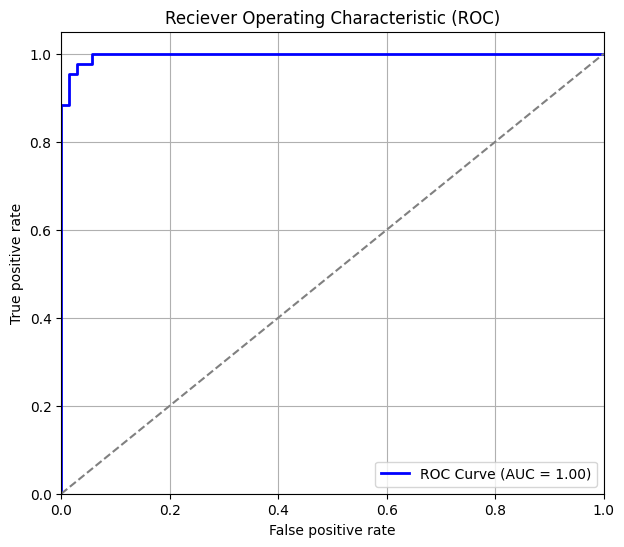

In [47]:
# Plotting the curve
plt.figure(figsize = (7,6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Reciever Operating Characteristic (ROC)")
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    preds = (y_pred_probs >= t).astype(int)
    print(f"Threshold: {t}")
    print(confusion_matrix(y_true, preds))
    print(classification_report(y_true, preds))


Threshold: 0.3
[[63  8]
 [ 0 43]]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        71
         1.0       0.84      1.00      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114

Threshold: 0.5
[[71  0]
 [16 27]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        71
         1.0       1.00      0.63      0.77        43

    accuracy                           0.86       114
   macro avg       0.91      0.81      0.84       114
weighted avg       0.89      0.86      0.85       114

Threshold: 0.7
[[71  0]
 [39  4]]
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.78        71
         1.0       1.00      0.09      0.17        43

    accuracy                           0.66       114
   macro avg       0.82   

In [49]:
from sklearn.metrics import accuracy_score

y_pred = (y_pred_probs >= 0.1).astype(int)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
accuracy_score(y_true, y_pred)


Accuracy: 0.37719298245614036


0.37719298245614036

In [50]:
# %% Save model checkpoint
checkpoint = {
    "epoch": epoch + 1,  # last epoch completed
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "loss": loss.item()
}

torch.save(checkpoint, "simple_ann_checkpoint.pth")
print("✅ Model saved as simple_ann_checkpoint.pth")


✅ Model saved as simple_ann_checkpoint.pth
